# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.015350e+01     5.688164e+00
 * time: 0.0043430328369140625
     1     2.746495e+01     5.974867e+00
 * time: 0.012965202331542969
     2     2.189622e+01     8.433770e+00
 * time: 0.03377509117126465
     3     1.338881e+01     2.278072e+00
 * time: 0.059252023696899414
     4     1.254519e+01     3.334108e+00
 * time: 0.07619810104370117
     5     1.161484e+01     1.726809e+00
 * time: 0.09309720993041992
     6     1.018128e+01     1.712140e+00
 * time: 0.11006999015808105
     7     9.762037e+00     7.718980e-01
 * time: 0.18391203880310059
     8     9.662115e+00     1.858578e+00
 * time: 0.1953420639038086
     9     9.434418e+00     1.066508e+00
 * time: 0.21072816848754883
    10     9.227846e+00     8.923618e-01
 * time: 0.22646713256835938
    11     9.058833e+00     6.962795e-01
 * time: 0.24229812622070312
    12     8.888320e+00     8.028068e-01
 * time: 0.253817081451416
    13     8.709428e+00     6.004940e-01
 * time

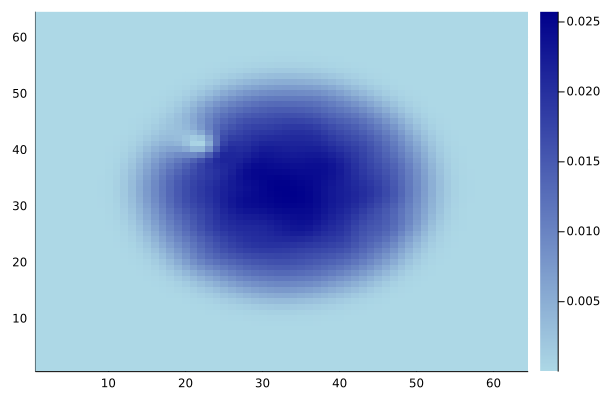

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)